# Case Study: Income group classification(WHO data) using Logistic Regression

### Context:
- DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

### Problem:

#### The data-set aims to answer the following key questions:

- What are the different factors that influence the income of an individual?

- Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

### Attribute Information:
The data contains characteristics of the people

- age: continuous - age of a Person
- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: no. of years a person studied - continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Investment gain of the person other than salary - continuous
- capital-loss: Loss from investments - continuous
- hours-per-week: No. of hours a person works - continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# libraries for data reading and manipulating
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for spliting data into train and test data
from sklearn.model_selection import train_test_split

# libraries - build model for prediction
from sklearn.linear_model import LogisticRegression

# libraries to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve, 
    roc_curve,
)


#### Load Data

In [2]:
data = pd.read_csv("who_data.csv")

In [3]:
# copying data into another variable to avoid any chnages in original dataset
df = data.copy()

In [4]:
# view the first 5 rows of dataset
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# view the last 5 rows from dataset
df.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32561, 15)

##### there are total 32561 rows and 15 columns in dataset

### Lets create numerical and categorical variable list

In [7]:
nu_col = df.select_dtypes(include=[np.number]).columns
cat_col = df.describe(include=["object"]).columns

print("Numerical Columns: ",nu_col)
print("Categorical Columns: ",cat_col)

Numerical Columns:  Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week'],
      dtype='object')
Categorical Columns:  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')


### Summary of numerical data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


- average age is 38. minimum and maximum age is 17, 90 respectively.
- average education_no_of_years are 10 year.
- capital_gain and capital_loss are 0 for 25, 50 and 75th percentile and have large value for max which means there are outliers
- average working_hours_per_week are 40

### Checking different levels in categorical data

In [9]:
for i in cat_col:
    print(df[i].value_counts())
    print(df[i].value_counts(1))
    print("*"*50)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
**************************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: 

- there are some values represented by '?' in workclass, occupation, native_country columns, which require further investigation
- there are many distinct values in native_country column, which can be reduced using continents respectivly
- distinct level of marital_status can be reduced

### Data Cleaning

#### we can assume whereever '?' in dataset, which means data is missing or unknown

#### workclass

In [10]:
#print(df[df['workclass'] == ' ?'].count())
df[df['workclass'] == ' ?'].sample(5)


,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
23865,67,?,200862,10th,6,Never-married,?,Not-in-family,Black,Female,0,0,35,United-States,<=50K
26687,34,?,310525,HS-grad,9,Married-civ-spouse,?,Husband,Black,Male,0,0,10,United-States,<=50K
6314,31,?,86143,HS-grad,9,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
16817,66,?,206560,HS-grad,9,Widowed,?,Not-in-family,Other,Female,0,0,35,Puerto-Rico,<=50K
24773,20,?,189203,Assoc-acdm,12,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


- looks like workclass and occupation both have '?' 
- and this records belongs to "United-States" which we need to investigate and confirm


In [11]:
df[df['workclass'] == ' ?']['occupation'].value_counts()

 ?    1836
Name: occupation, dtype: int64

- from above result, it's true that wherever workclass have '?', occupation also have '?'
- this indicates both columns missingness have strong pattern

In [12]:
df[df['workclass'] == ' ?']['native_country'].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

- the above observation don't hold the native_country as there many other countries where the observations are '?'

### occupation

In [13]:
df[df['occupation'] == ' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
8297,24,?,41356,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
17326,33,?,49593,Some-college,10,Married-civ-spouse,?,Wife,Black,Female,0,0,30,United-States,<=50K
20396,41,?,77937,12th,8,Divorced,?,Not-in-family,White,Female,0,0,40,Canada,<=50K
12451,90,?,225063,Some-college,10,Never-married,?,Own-child,Asian-Pac-Islander,Male,0,0,10,South,<=50K
6342,70,?,293076,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,30,United-States,<=50K


In [14]:
df[df['occupation'] == ' ?']['workclass'].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

- we observe the same pattern here, where occupation is '?' most of the values in workclass are '?'

In [15]:
df[df['occupation'] == ' ?']['native_country'].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

- The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

### native_country

In [16]:
df[df['native_country'] == ' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
3256,44,Private,180985,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,?,>50K
8225,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,?,>50K
21382,62,Local-gov,41793,Masters,14,Separated,Prof-specialty,Not-in-family,White,Female,0,0,50,?,<=50K
27141,36,Private,74791,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,?,<=50K
3187,40,Private,170230,Bachelors,13,Married-spouse-absent,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K


In [17]:
df[df['native_country'] == ' ?']['occupation'].value_counts()

 Prof-specialty       102
 Other-service         83
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Farming-fishing        5
 Protective-serv        5
Name: occupation, dtype: int64

In [18]:
df[df['native_country'] == ' ?']['workclass'].value_counts()

 Private             410
 Self-emp-not-inc     42
 Self-emp-inc         42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

### there is no clear pattern

### Observations:

- We observe that all the observations where workclass = ? the values in the occupation are ?
- the strong pattern b/w workclass and occupation makes sense as both of these variables capture same information
- there is no strong correlation of ? observations in occupation and workclass with native_country
- for now we will replace these ? with the 'unknown' category

### Replacing ? with 'Unknown'

In [19]:
df.workclass = df.workclass.apply(lambda x: "Unknown" if x == ' ?' else x)
df.native_country = df.native_country.apply(lambda x: "Unknown" if x== ' ?' else x)
df.occupation = df.occupation.apply(lambda x: "Unknown" if x== ' ?' else x)

### Mapping countries to continents to reduce the number of unique values

In [20]:
df.native_country.nunique()

42

### there are 42 countries in the dataset , we can reduce them to their respective continents as this will help us to reduce the dimention of data

In [21]:
# remove empty space from string
df.native_country = df.native_country.str.replace(" ","")

In [22]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [23]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [24]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [25]:
df['native_country'] = df['native_country'].apply(region_combining)

In [26]:
df.native_country.unique()

array(['north_america', 'asia', 'other', 'europe', 'south_america'],
      dtype=object)

#### now native_country column have 5 unique values

In [27]:
### reduce unique value in marital_status column
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

#### we can reduce these values in below groups
- Married
- Not-Married
- Never-Married

In [28]:
df.marital_status = df.marital_status.str.replace(" ","")

In [29]:
married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Married-spouse-absent", "Separated", "Widowed"]

In [30]:
def reduce_marital_status(x):
    if x in married:
        return "Married"
    elif x in not_married:
        return "Not-Married"
    else:
        return x

In [31]:
df.marital_status = df.marital_status.apply(reduce_marital_status)

In [32]:
df.marital_status.unique()

array(['Never-married', 'Married', 'Not-Married'], dtype=object)

- Values have been clbed in 3 categories

In [33]:
df_clean = df.copy()

### Lets explore data in depth

### Univariate Analysis on Numeric Data

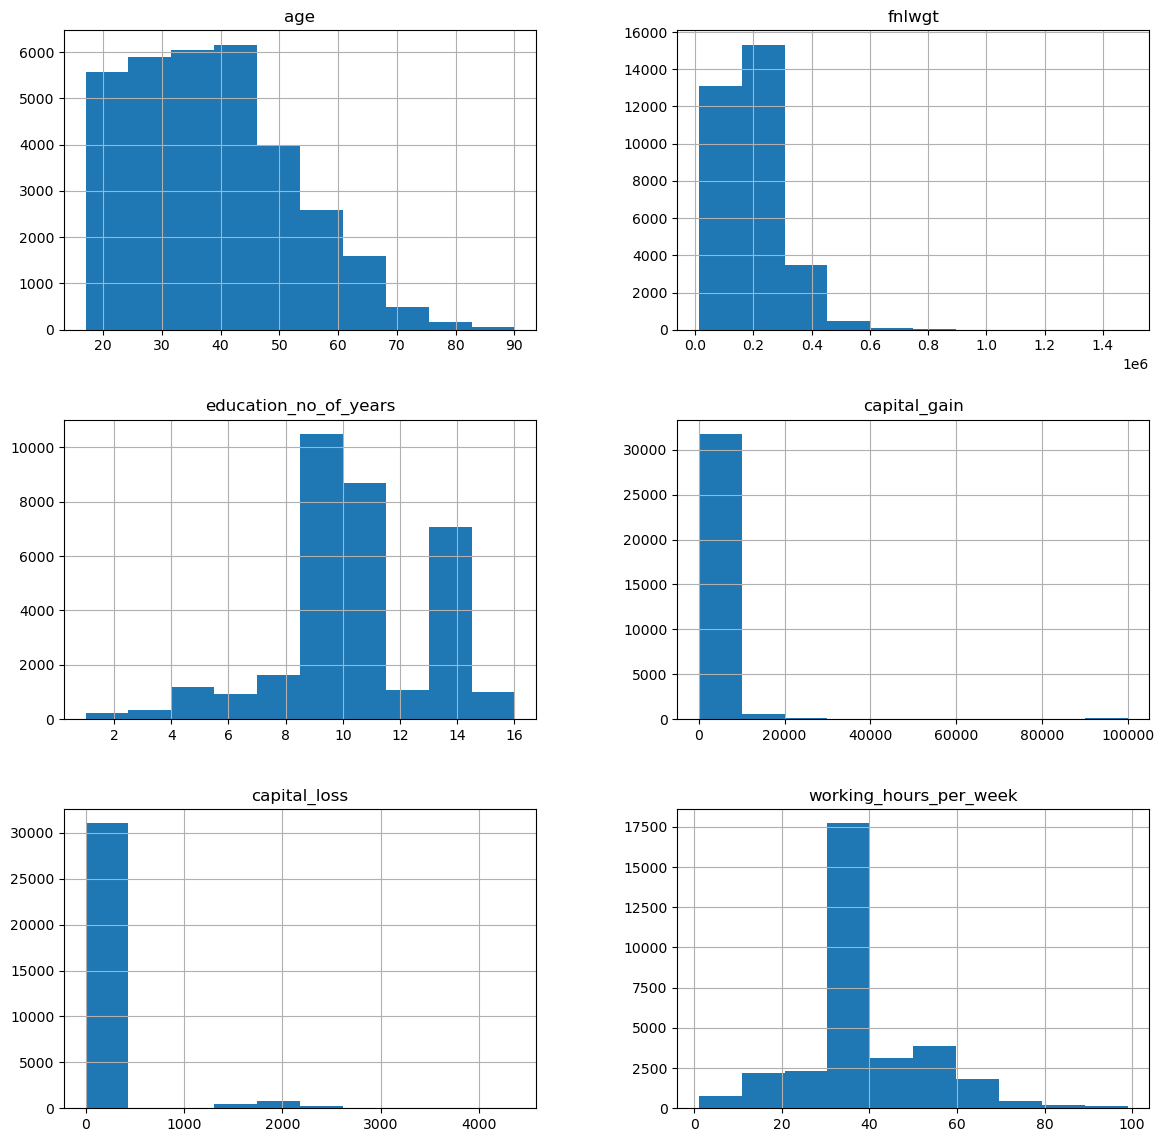

In [35]:
df_clean[nu_col].hist(figsize=(14,14));

- age: minimum age of dataset is 17 and max is 90, and average age is 38. it's slightly right skewed.
- education_no_of_years: average no of education years are 10, there is a large difference b/w min and 25 percentile value which means, there are outliers in dataset
- capital_loss: thers is huge difference b/w 75 percentile and max value which means, dataset have outliers.
- capital_gain: there is huge difference in 75 percentile and max value which means dataset have outlier and 75 percentile value is 0.
- fnlwgt: fnlwgt is right skewed.
- working_hours_per_week: average working hours 40, which means most of the employees are private salaried employee. but there are few records have minimum no of hours 1 which requires further investigation.

workclass


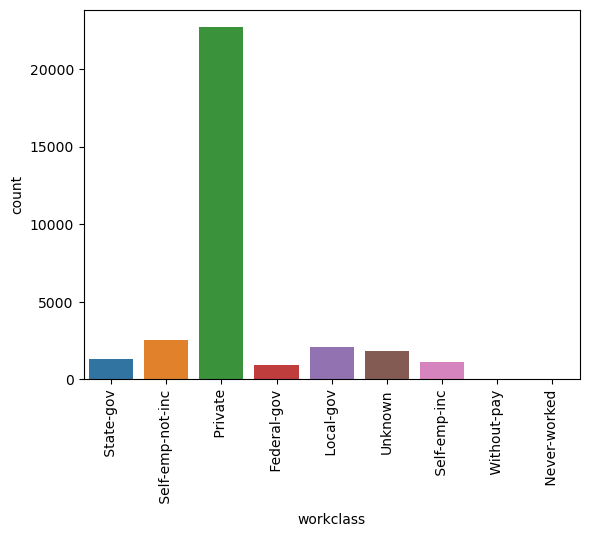

****************************************************************************************************
education


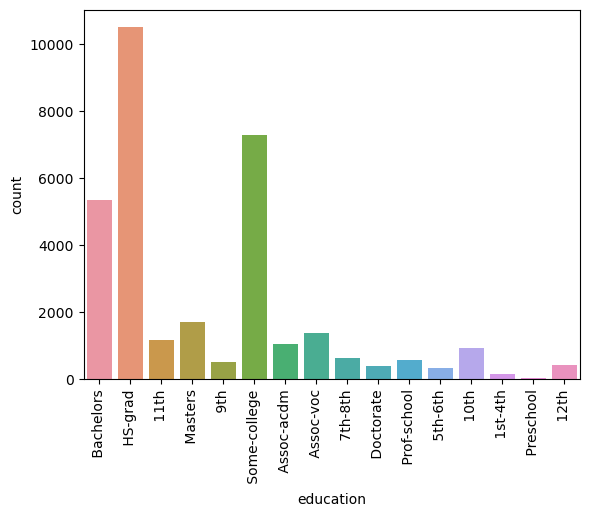

****************************************************************************************************
marital_status


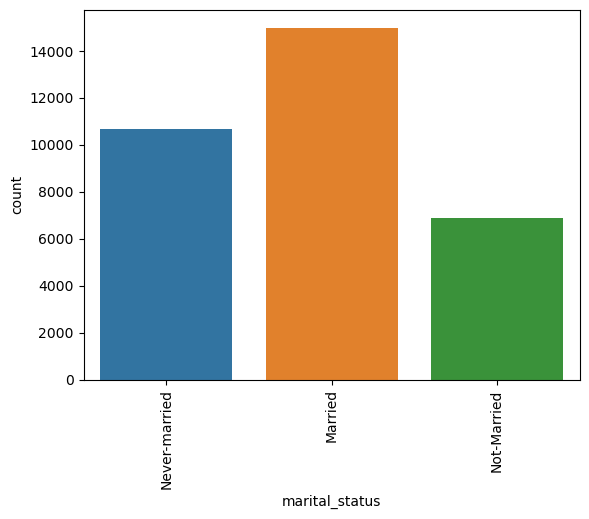

****************************************************************************************************
occupation


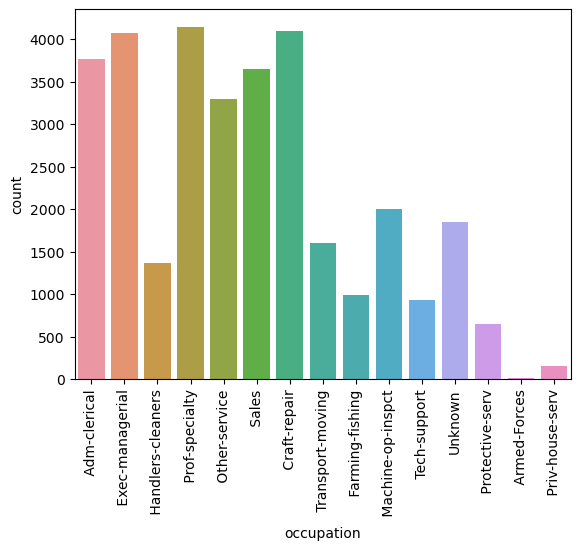

****************************************************************************************************
relationship


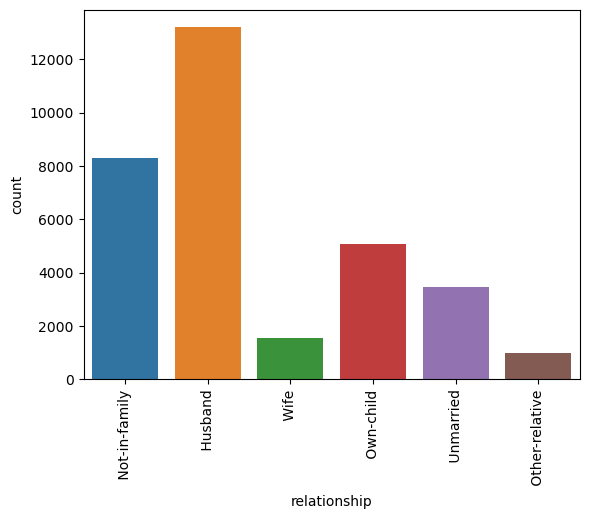

****************************************************************************************************
race


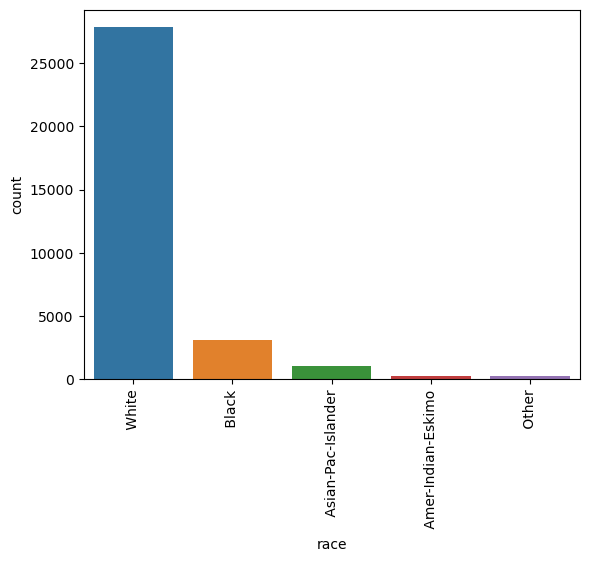

****************************************************************************************************
sex


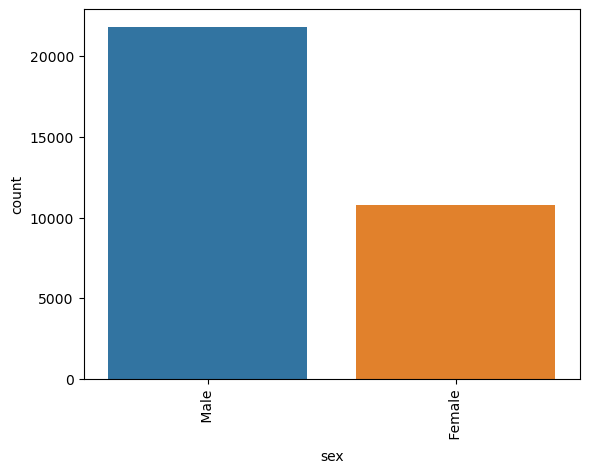

****************************************************************************************************
native_country


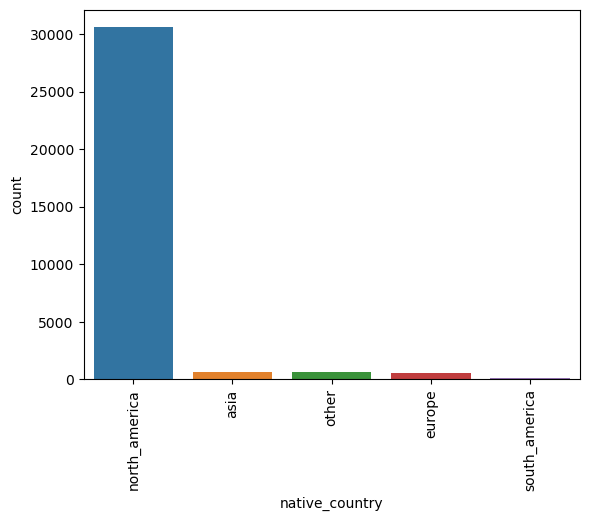

****************************************************************************************************
salary


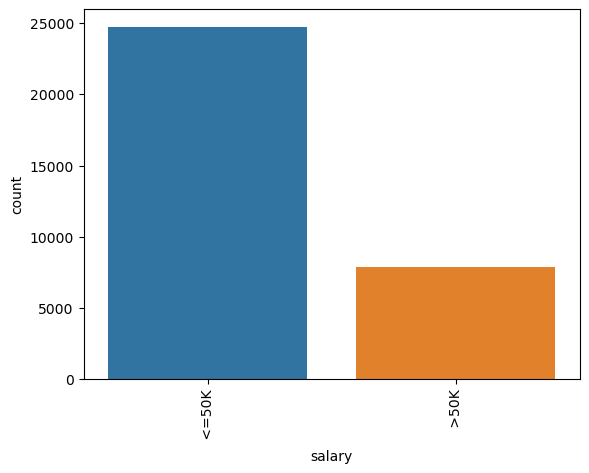

****************************************************************************************************


In [51]:
for i in cat_col:
    print(i)
    sns.countplot(data=df_clean, x=i)
    plt.xticks(rotation=90)
    plt.show()
    print("*"*100)

- workclass: most of the dataset belongs to private salaried people.
- sex: males are higher then female
- native_country: lots of people belongs to north amrica
- salary: most of the dataset have <= 50k salary

### Bivariate Analysis

In [52]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2,2, figsize=(12,10))
    target_unique = data[target].unique()
    axs[0,0].set_title("Distribution of target for target="+str(target_unique[0]))
    sns.histplot(data=data[data[target] == target_unique[0]], x= predictor, kde=True, ax=axs[0,0], color="teal",stat="density")
    axs[0,1].set_title("Distribution of target for target="+str(target_unique[1]))
    sns.histplot(data=data[data[target] == target_unique[1]], x = predictor, kde=True, ax=axs[0,1], color="orange", stat="density")
    axs[1,0].set_title("Boxplot w.r.t. target")
    sns.boxplot(data=data, x= target, y=predictor, ax=axs[1,0])
    axs[1,1].set_title("Boxplot w.r.t. target (without outliers)")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1,1], showfliers=False)
    plt.tight_layout()
    plt.show()

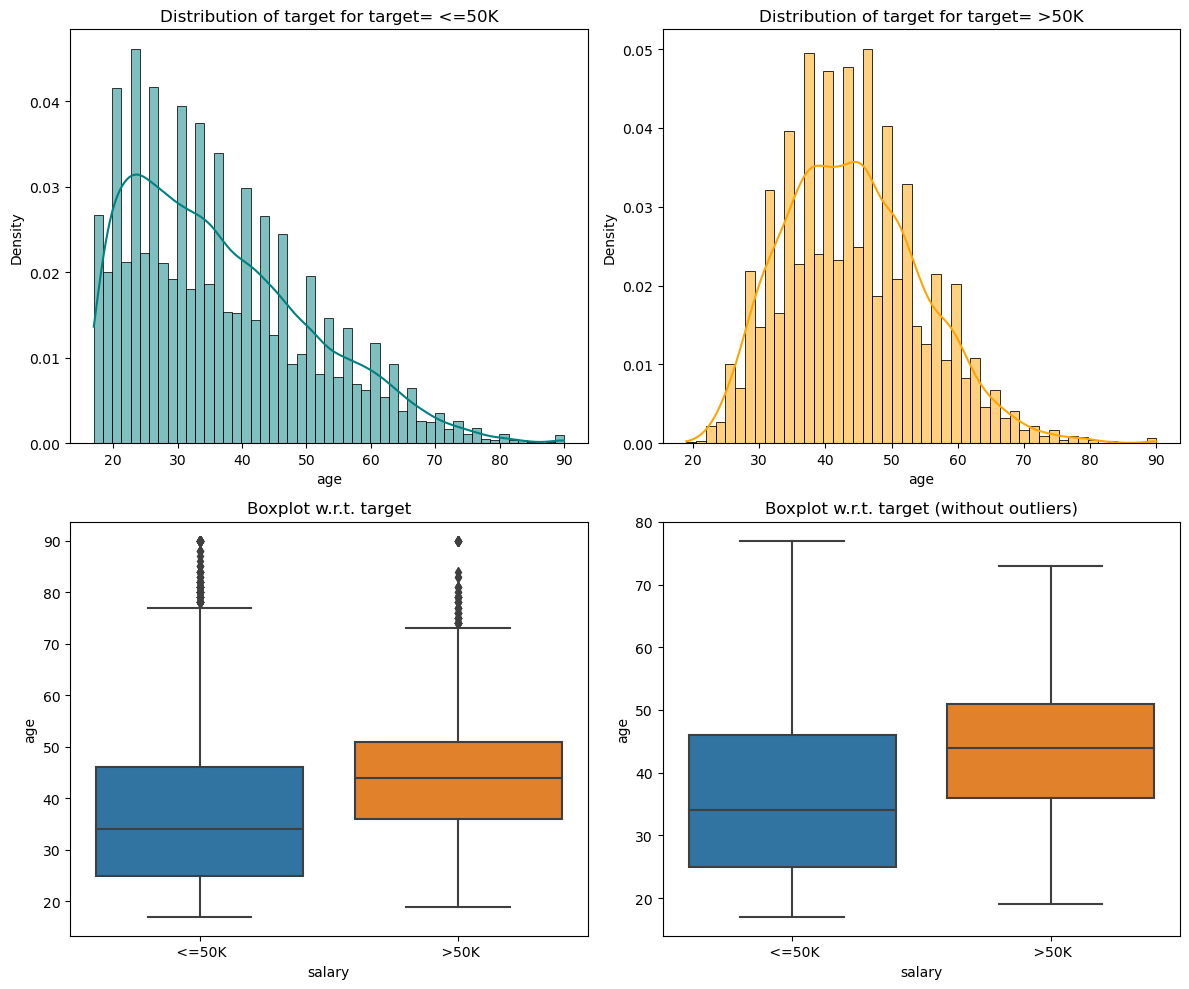

In [53]:
distribution_plot_wrt_target(df_clean, "age", "salary")

- people who more than 50k salary are generally older having an average age of around 48 years.
- people who have less than 50k salary have an average age of around 36

### salary vs occupation

In [63]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-"*120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter,ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count+5,5))
    plt.legend(loc ="lower left", frameon= False)
    plt.legend(loc ="upper left", bbox_to_anchor=(1,1))
    plt.show()

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


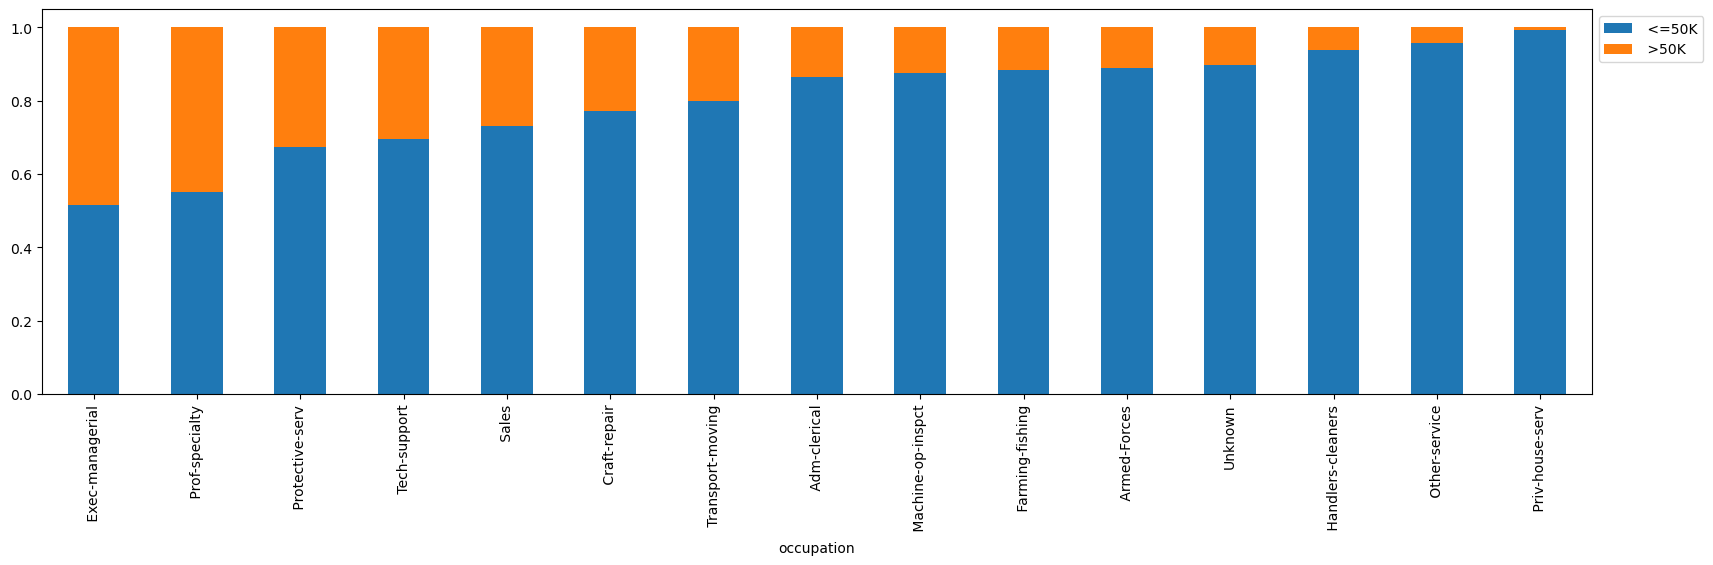

In [64]:
stacked_barplot(df_clean, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs education

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


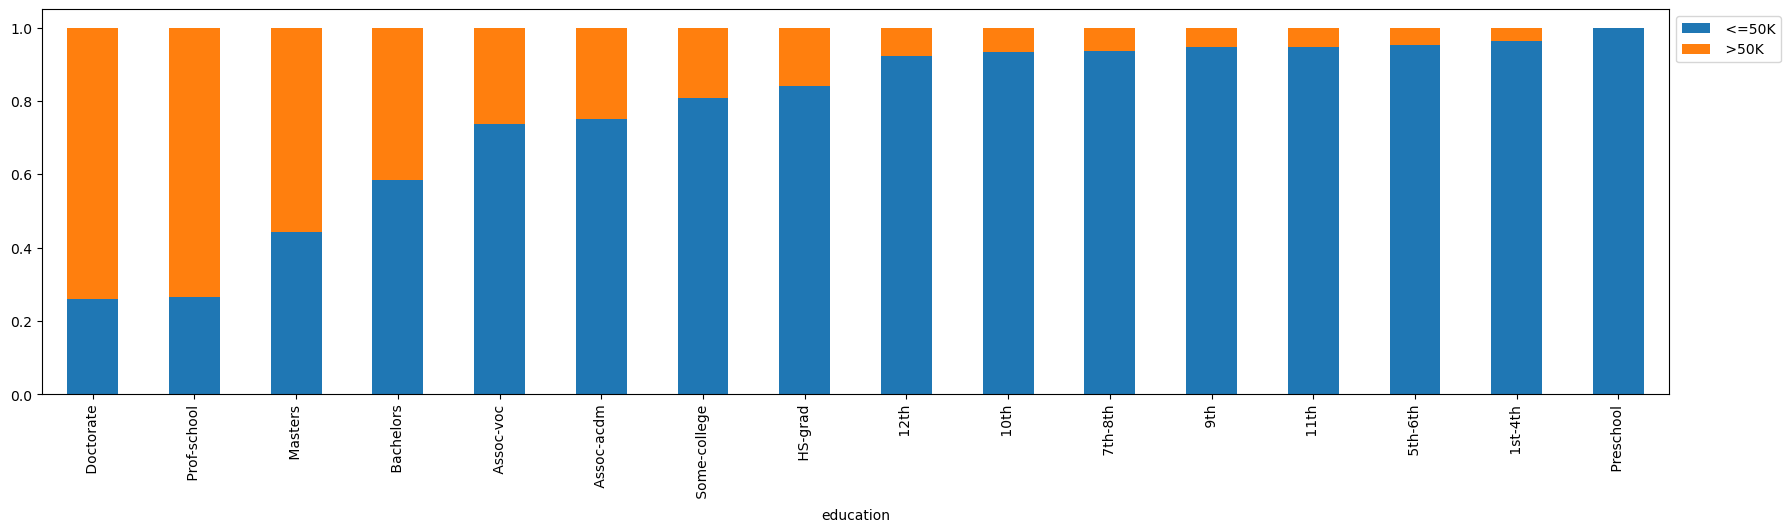

In [65]:
stacked_barplot(df_clean, "education", "salary")

- ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


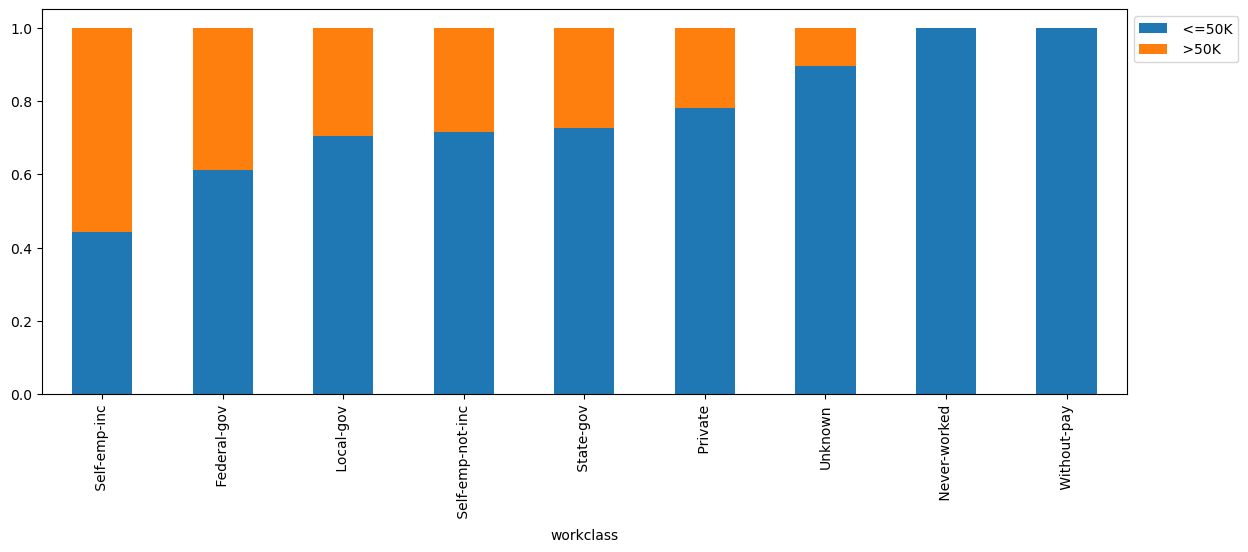

In [66]:
stacked_barplot(df_clean, "workclass", "salary")

- ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.

### salary vs working_hours_per_week

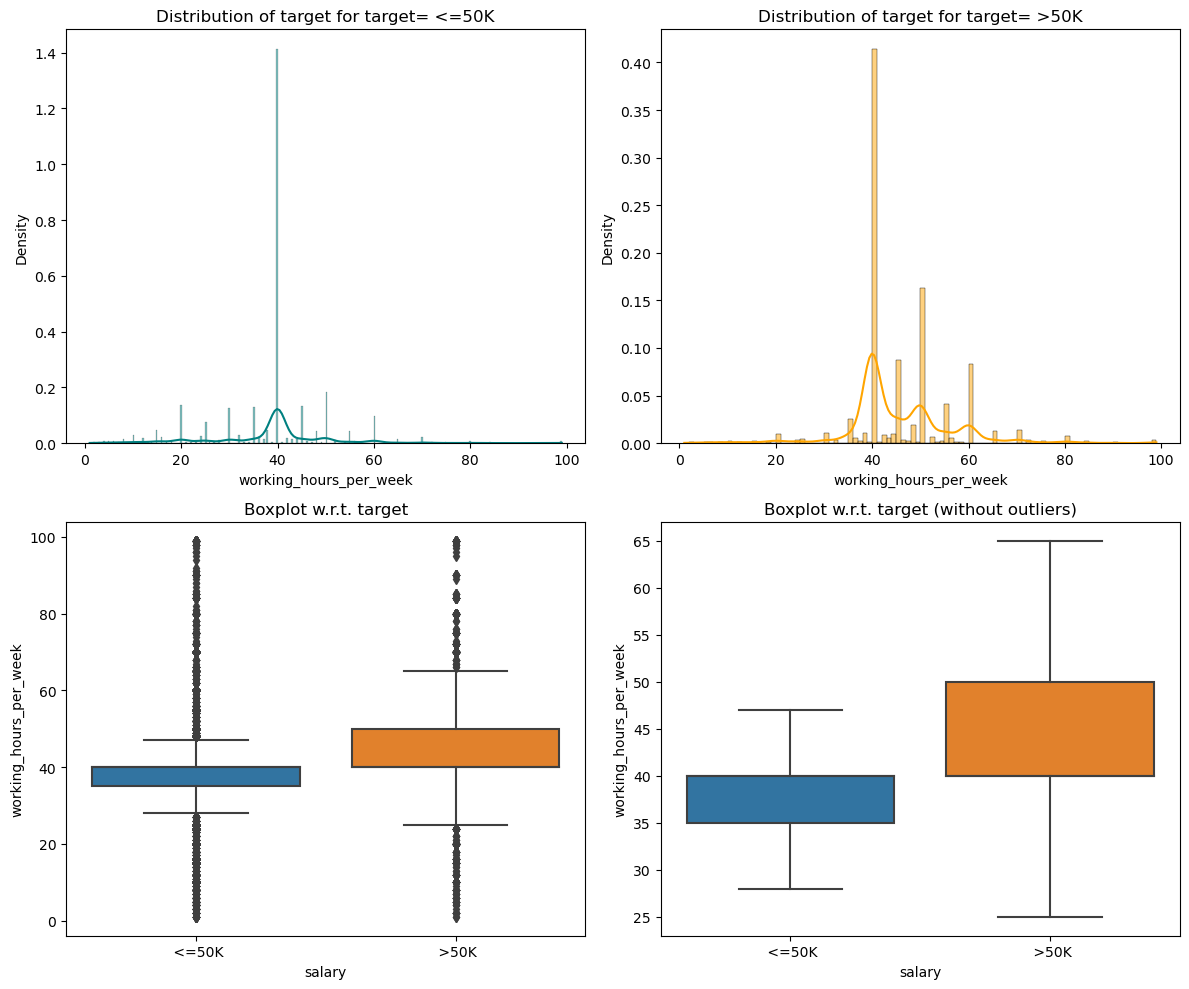

In [67]:
distribution_plot_wrt_target(df_clean, "working_hours_per_week", "salary")

- Majority of people having above 50K salary work around 40 hours per week.
- salary vs native_country : More than 90% of the people from south_america are likely to have <=50k Salary. From asia and europe, around 70% of the people have <=50k salary.

### Actions for data pre-processing

- Many variables have outliers that need to be treated.
- We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

- Dropping capital_gain and capital_loss
- There are many outliers in the data which we will treat (perform capping of outliers).
- All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

#### Dropping capital_gain and capital_loss

In [69]:
df_clean.drop(["capital_gain","capital_loss"], axis=1, inplace=True)

#### Outliers detection using boxplot

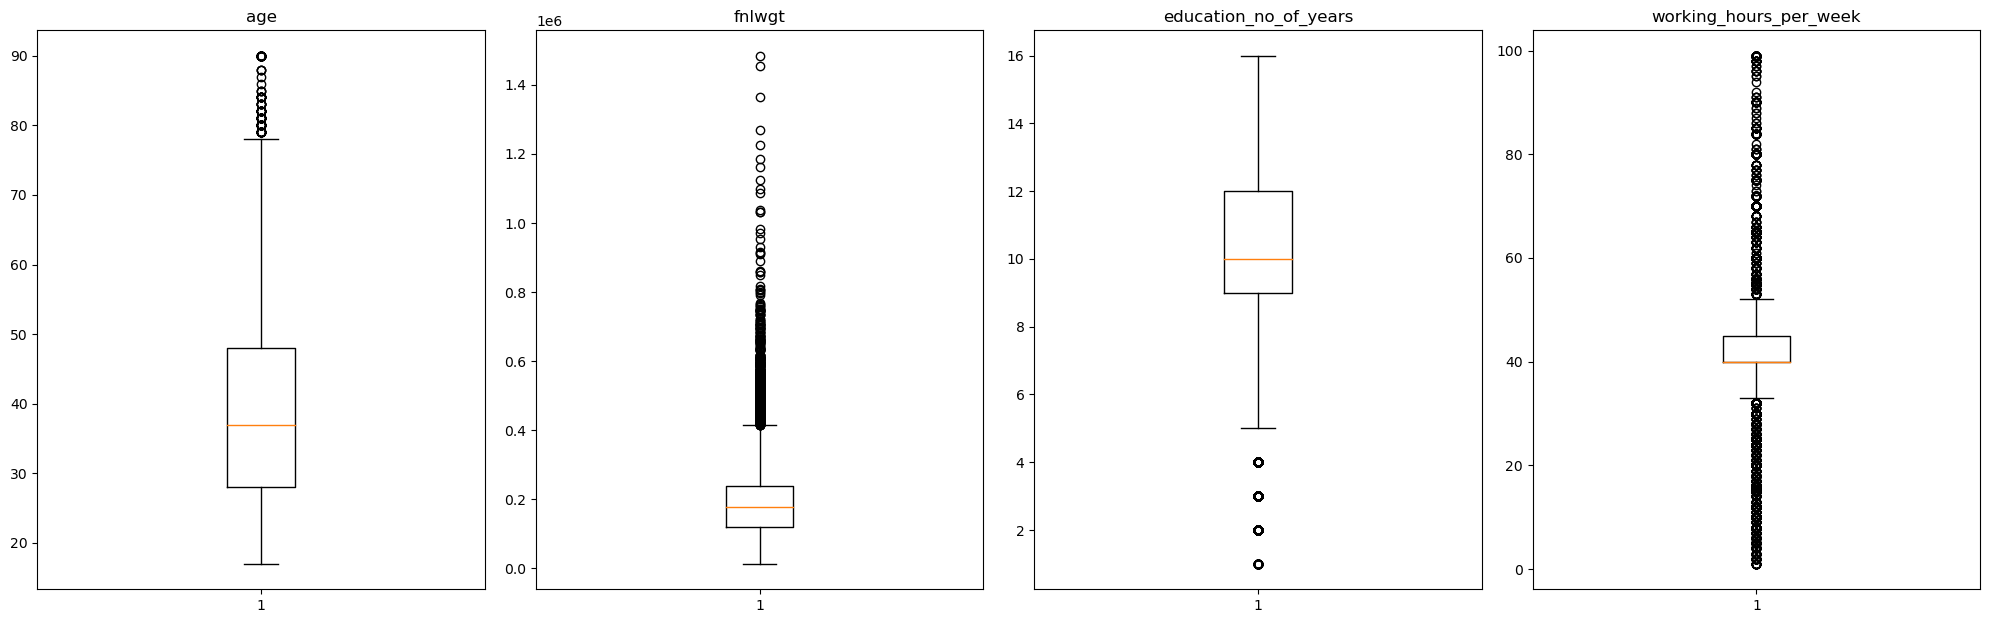

In [71]:
numerical_col = df_clean.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))
for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_clean[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

- Age and fnlwgt have upper outliers.
- education_no_years has lower outliers.
- working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [74]:
# functions to treat outliers by flooring and capping

def treat_outliers(df,col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col],Lower_Whisker, Upper_Whisker)
    
    return df

def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

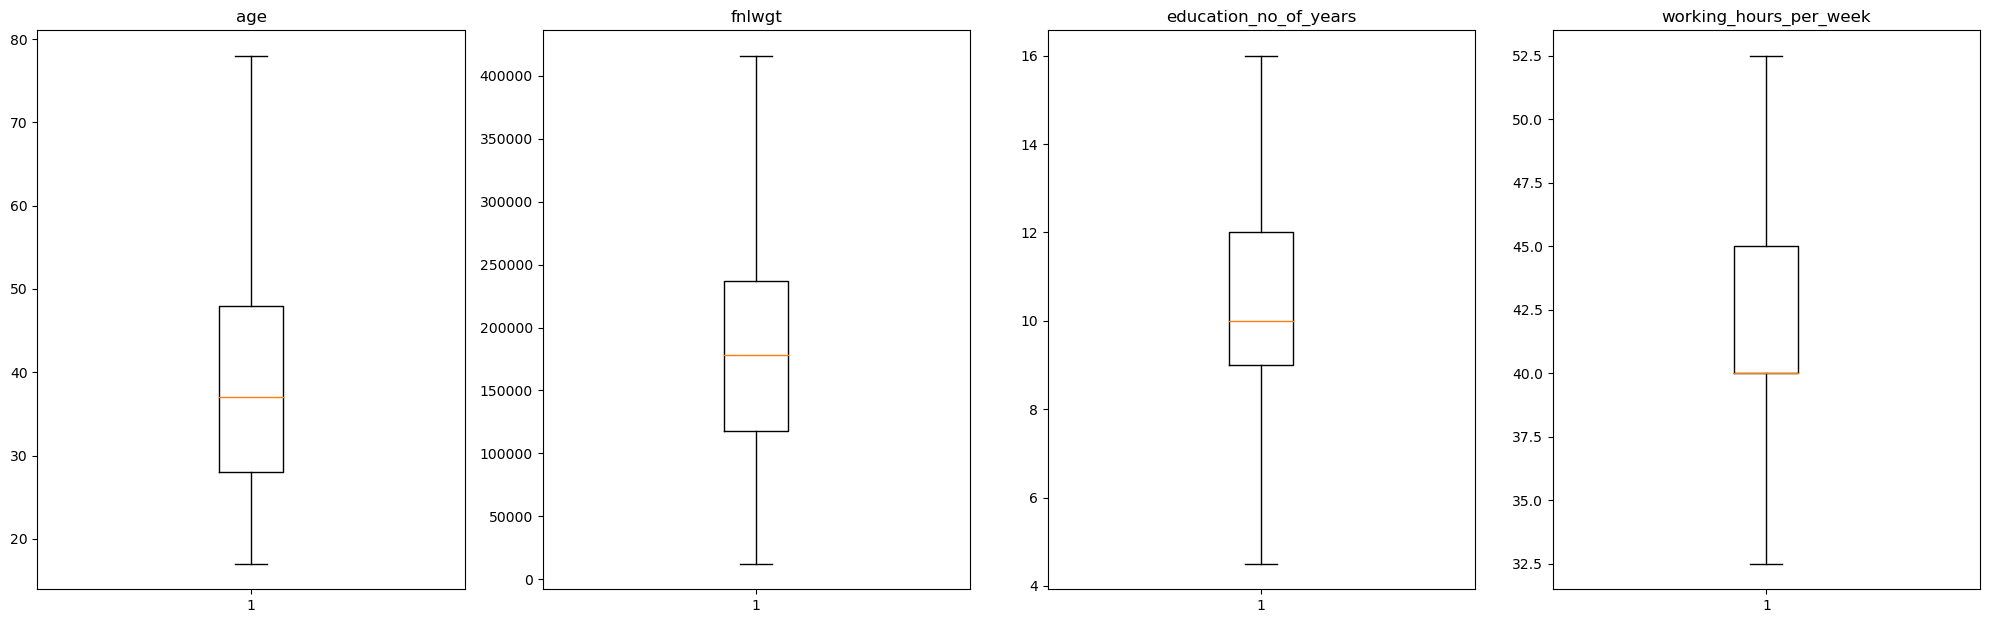

In [75]:
numerical_col = df_clean.select_dtypes(include=np.number).columns.tolist()
df_clean = treat_outliers_all(df_clean, numerical_col)

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_clean[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation

#### Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.

In [76]:
df_clean["salary"] = df_clean["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

##### Creating training and test sets.

In [77]:
X = df_clean.drop(["salary"], axis=1)
Y = df_clean["salary"]

X = pd.get_dummies(X, drop_first=True)

#splitting data in train and test set

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)


In [78]:
print("Shape of Training set: ", X_train.shape)
print("Shape of Test set: ", X_test.shape)
print("Percentage of classes in training set: ")
print(y_train.value_counts(normalize=True))
print("Percentagr of classes in test set: ")
print(y_test.value_counts(normalize=True))

Shape of Training set:  (22792, 57)
Shape of Test set:  (9769, 57)
Percentage of classes in training set: 
1    0.753335
0    0.246665
Name: salary, dtype: float64
Percentagr of classes in test set: 
1    0.772853
0    0.227147
Name: salary, dtype: float64


### Building the model

#### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
- Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

Which case is more important?

- Both the cases are important as:
- if we predict a person has a salary <= 50k but actually the salary is >50k then a wrong person will be getting the benefits of the scheme and government might lose resources.
- if we predict a person doesn't have a salary <= 50k but actually the salary is <= 50k that person will not be able to avail the benefits of the scheme constituting to opeertunity loss.

How to reduce this loss i.e need to reduce False Negatives?

- f1_score should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

- The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
- The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [102]:
# defining a function to compute different metrics to check performance of a classification model using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # predicting using the independent variables
    
    pred_prob = model.predict_proba(predictors)[:,1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    df_perf = pd.DataFrame({"Accuracy": acc,"Recall": recall, "Precision": precision, "F1":f1,},index = [0],)
    
    return df_perf
    

In [103]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regrssion

In [104]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)


#### Checking model performance on training set

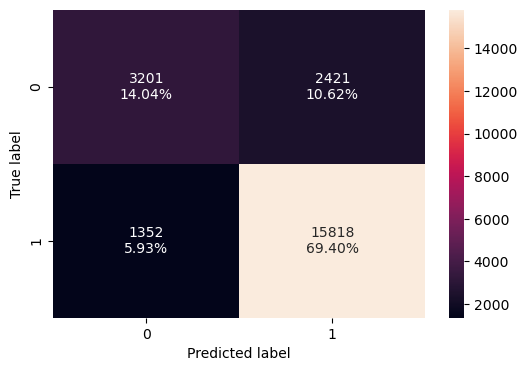

In [105]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [106]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train,y_train)
print("Traingin Performance")
log_reg_model_train_perf

Traingin Performance


,Accuracy,Recall,Precision,F1
0,0.834459,0.921258,0.867262,0.893445


#### Checking performance on test set

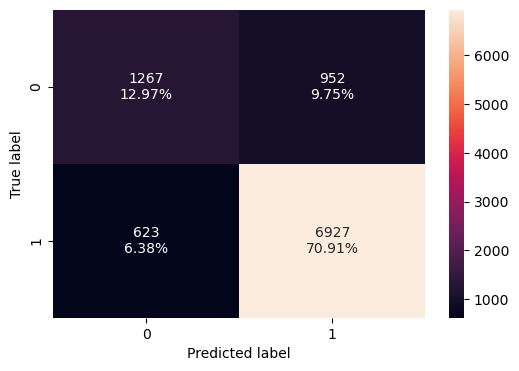

In [107]:
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [108]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)
print("test performance")
log_reg_model_test_perf

test performance


,Accuracy,Recall,Precision,F1
0,0.838776,0.917483,0.879172,0.89792


#### ROC-AUC

- The area under ROC curve (AUC) is a measure of how good the model is - the higher the AUC , the better the model is, at distingushing b/w classes 

1. predict_proba - predicts the probablity for class 0 and 1

Input: Train or test data
Output: Returns the predicted probabilities for class 0 and 1

2. roc_curve_score - Returns the auc scores

Input:

     1. Training data
     2. Predicted Probability
     
Output: AUC scores between 0 and 1

3. roc_curve
Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.

Input:

    1. Training data
    2. Predicted Probability

Output: False positive rate, true positive rate and threshold values

### ROC-AUC on training set

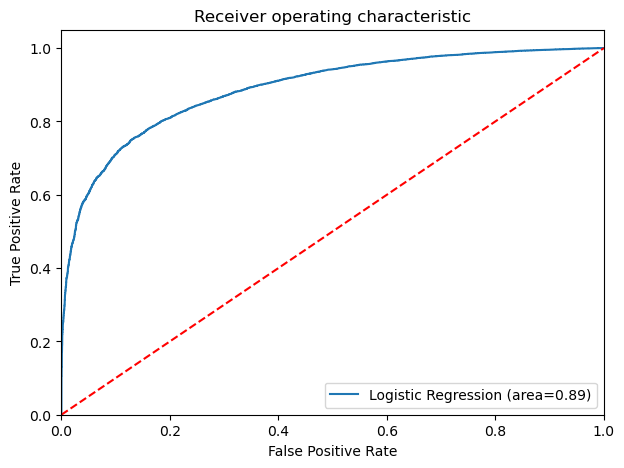

In [109]:
# find roc_auc_score for training data

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])

fpr, tpr, thresholds = roc_curve(y_train,lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area=%0.2f)" %logit_roc_auc_train)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC on test data

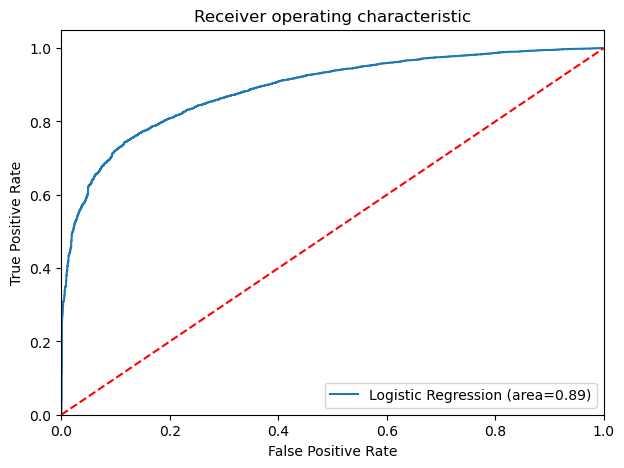

In [110]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area=%0.2f)" % logit_roc_auc_test)
plt.plot([0,1],[0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Model is giving a generalized performance

##  Model Performance Improvement

Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

## Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate

In [111]:
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])

optimal_idx = np.argmax(tpr-fpr)

optimal_threshold_auc_roc = thresholds[
    optimal_idx
] 

print(optimal_threshold_auc_roc)

0.7715905990303509


#### Checking model performance on training set

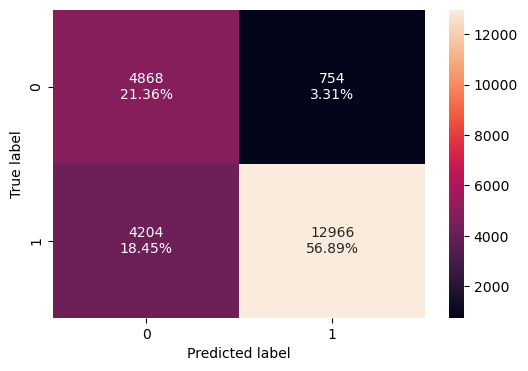

In [112]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [113]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.782468,0.755154,0.945044,0.839495


Checking model performance on test set

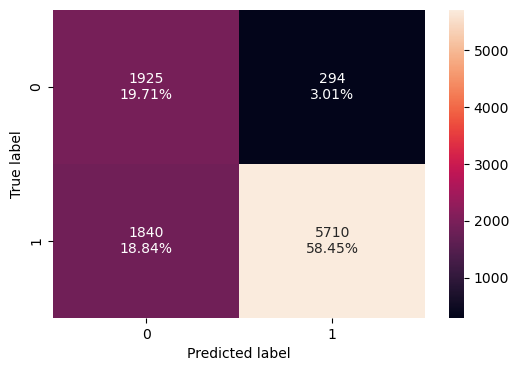

In [114]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [115]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.781554,0.756291,0.951033,0.842556


- The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold
The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement.

#### precision_recall_curve()
Returns the fpr, tpr and threshold values

Input:

    1. Original data
    2. Predicted Probability

Output: False positive rate, true positive rate and threshold values

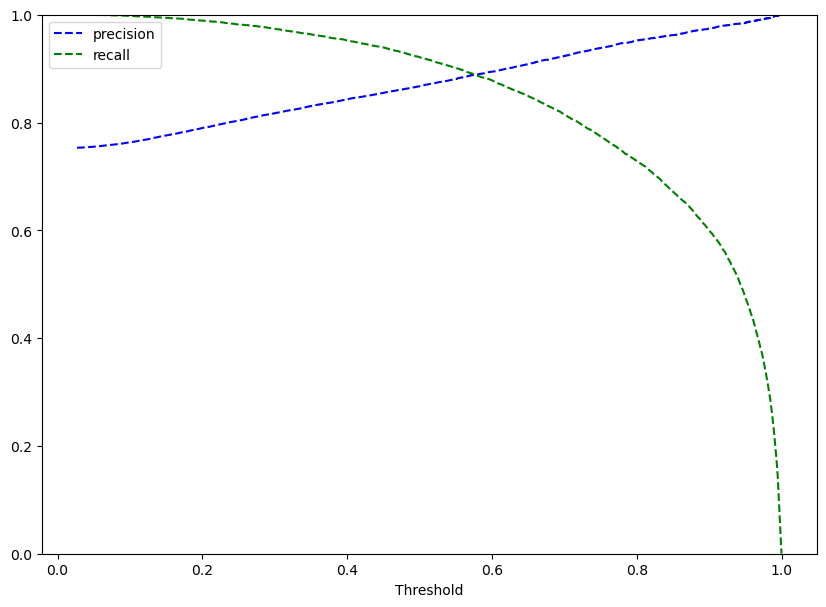

In [117]:
y_scores = lg.predict_proba(X_train)[:,1]

prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At the threshold of 0.58, we get balanced recall and precision.

### Checking model performance on training set

In [118]:
# setting the threshold
optimal_threshold_curve = 0.58

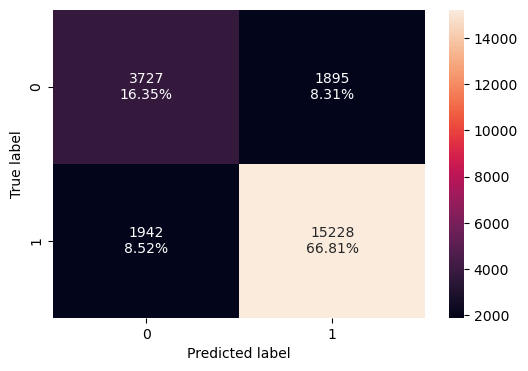

In [119]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [120]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831651,0.886896,0.88933,0.888111


#### Checking model performance on test set

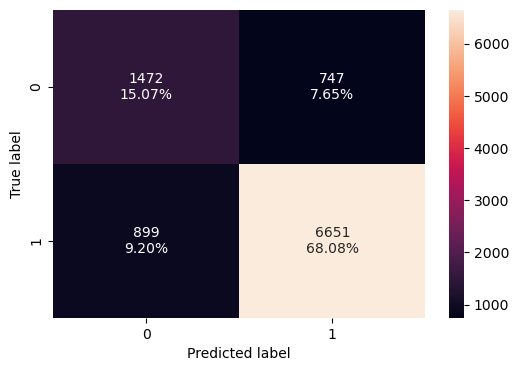

In [121]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [122]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.831508,0.880927,0.899027,0.889885


- Model is performing well on training and test.
- There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

#### Model Performance Summary

In [123]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.834459,0.782468,0.831651
Recall,0.921258,0.755154,0.886896
Precision,0.867262,0.945044,0.889330
F1,0.893445,0.839495,0.888111


In [124]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.838776,0.781554,0.831508
Recall,0.917483,0.756291,0.880927
Precision,0.879172,0.951033,0.899027
F1,0.897920,0.842556,0.889885
